In [1]:
import pymysql

cnx = pymysql.connect(user='pgbia20p2g06', password='@mysqlHKG6QY',
                              host='10.126.209.159',
                              database='nos')

import pandas as pd
cli = pd.read_sql("SELECT * FROM client_list_eurekathon", cnx);
profile = pd.read_sql("SELECT * FROM client_profile_data_eurekathon", cnx);
tv = pd.read_sql("SELECT * FROM client_tv_data_eurekathon", cnx);
mobile = pd.read_sql("SELECT * FROM client_mobile_data_eurekathon", cnx);
indic = pd.read_sql("SELECT * FROM indicators_data_eurekathon", cnx);

pd.set_option('display.expand_frame_repr', False)

cnx.close()

In [2]:
cli.head()

,sa,is_donor,month_id
0,4329560142D21690C211BCA3EE65C83C,NaN,202005
1,E516D7AADFF328836280B1969577D80D,NaN,202005
2,1068EC724654A19CBF73771104F00C6B,NaN,202005
3,92BC24B777B922C3A61517604AFB0040,NaN,202005
4,01CEC8EC107C6A174ECDA938DD53FCE2,NaN,202005


## Table cli

In [3]:
#it's normal
cli.isnull().sum(axis=0).loc[cli.isnull().sum(axis=0)>0]/len(cli)*100

is_donor    99.770751
dtype: float64

In [4]:
cli.shape

(455401, 3)

In [5]:
for var in cli.columns:
    if len(cli[var].unique())<10:
        print(var,': ',cli[var].unique())
    else:
        print(var)

sa
is_donor :  [nan  1.]
month_id :  ['202005' '202006' '202007' '202008']


In [6]:
cli2=cli.copy()
cli2.is_donor=cli2.is_donor.fillna(0)

In [7]:
cli2.dtypes

sa           object
is_donor    float64
month_id     object
dtype: object

## Table profile

In [8]:
#2 primeiros é normal
profile.isnull().sum(axis=0).loc[profile.isnull().sum(axis=0)>0]/len(profile)*100

step_entry_open_amt_bin    83.154376
after_due_days_qty_bin     83.154376
pack_tem_a_flg              0.358253
pack_tem_b_flg              0.358253
pack_tem_c_flg              0.358253
typeh_card_qty              0.358253
typei_card_qty              0.358253
typea_card_qty              0.358253
typeb_card_qty              0.358253
typec_card_qty              0.358253
typed_card_qty              0.358253
typee_card_qty              0.358253
typef_card_qty              0.358253
typeg_card_qty              0.358253
premium_qty                 0.358253
premium_flg                 0.358253
pack_dsc                    0.358253
premium_a_qty               0.358253
premium_b_qty               0.358253
premium_c_qty               0.358253
premium_d_qty               0.358253
dtype: float64

In [9]:
profile.shape

(1085546, 35)

In [10]:
for var in profile.columns:
    if len(profile[var].unique())<15:
        print(var,': ',profile[var].unique())
    else:
        print(var)

sa
cp4
dsc_class_churn :  [0 1 2]
geom_distrito_dsc
geom_municipio_dsc
geom_freguesia_dsc
geom_nuts_i_dsc :  ['CONTINENTE' 'INDEFINIDO']
geom_nuts_ii_dsc :  ['LISBOA (NUTS II)' 'CENTRO' 'NORTE' 'ALENTEJO' 'ALGARVE (NUTS II)'
 'INDEFINIDO']
geom_nuts_iii_dsc
step_entry_open_amt_bin :  [nan  2. 10.  5.  9.  8.  4.  3.  6.  7.  1.]
after_due_days_qty_bin :  [nan  0.  1.  4.  5.  8.  7.  6.  3.  2. 10.  9.]
pack_tem_a_flg :  [ 0.  1. nan]
pack_tem_b_flg :  [ 0.  1. nan]
pack_tem_c_flg :  [ 0.  1. nan]
typeh_card_qty :  [ 0.  1.  2.  3.  4. nan  9.  7.  5.  6.]
typei_card_qty
typea_card_qty :  [ 0.  1.  2.  5.  4.  3.  6. nan  7.  8. 10.  9. 12.]
typeb_card_qty :  [ 0.  1.  2.  3. nan 10.  4.  5. 17.  6. 16.]
typec_card_qty :  [ 2.  3.  1.  0.  4.  5.  6.  7. nan  8.  9. 12. 11. 10.]
typed_card_qty :  [ 0.  2.  1.  3. nan  4.]
typee_card_qty :  [ 0.  1. nan  3.  2.]
typef_card_qty :  [ 0.  1. nan  2.]
typeg_card_qty :  [ 0.  1. nan]
premium_qty
premium_flg :  [ 0.  1. nan]
pack_dsc
premium_

In [13]:
profile2=profile.copy()

profile2.step_entry_open_amt_bin=profile2.step_entry_open_amt_bin.fillna(0)
profile2.after_due_days_qty_bin=profile2.after_due_days_qty_bin.fillna(0)

In [14]:
profile2.dtypes

sa                          object
cp4                         object
dsc_class_churn              int64
geom_distrito_dsc           object
geom_municipio_dsc          object
geom_freguesia_dsc          object
geom_nuts_i_dsc             object
geom_nuts_ii_dsc            object
geom_nuts_iii_dsc           object
step_entry_open_amt_bin    float64
after_due_days_qty_bin     float64
pack_tem_a_flg             float64
pack_tem_b_flg             float64
pack_tem_c_flg             float64
typeh_card_qty             float64
typei_card_qty             float64
typea_card_qty             float64
typeb_card_qty             float64
typec_card_qty             float64
typed_card_qty             float64
typee_card_qty             float64
typef_card_qty             float64
typeg_card_qty             float64
premium_qty                float64
premium_flg                float64
pack_dsc                    object
premium_a_qty              float64
premium_b_qty              float64
premium_c_qty       

In [15]:
profile2.pack_dsc.unique()

array(['NOS4i_100Mb + MÃ³vel Min2 PM_Ben (003)',
       'NOS5i_100Mb + MÃ³vel 5GB + Roaming + 7GB_NPVR (002)',
       'NOS5u_200Mb + MÃ³vel 7GB + Roaming + 7GB (001)', ...,
       '3Pro IRIS_RN+INT_1Gb_NP2_PM (07)', 'TV_Mais Digital HD (001)',
       'NOS3_100Mb (023)'], dtype=object)

## Table tv

In [16]:
#Apenas o genero é estranho
tv.isnull().sum(axis=0).loc[tv.isnull().sum(axis=0)>0]/len(tv)*100

subcategory_2     0.703811
subcategory_3     1.340599
subcategory_4     1.981847
subcategory_5     2.614173
subcategory_6     3.254640
subcategory_7     3.915627
subcategory_8     4.598473
subcategory_9     5.270947
subcategory_10    5.939852
gender            9.387424
dtype: float64

In [17]:
tv.shape

(896689, 37)

In [18]:
for var in tv.columns:
    if len(tv[var].unique())<15:
        print(var,': ',tv[var].unique())
    else:
        print(var)

sa
subcategory_1
subcategory_2
subcategory_3
subcategory_4
subcategory_5
subcategory_6
subcategory_7
subcategory_8
subcategory_9
subcategory_10
subcategory_qtd_seconds_mon_1_bin :  [ 5  8  6  9  2 10  3  7  4  1]
subcategory_qtd_seconds_mon_2_bin :  [ 3  6  4  5 10  9  2  1  8  7]
subcategory_qtd_seconds_mon_3_bin :  [ 3  4  6 10  7  9  8  5  2  1]
subcategory_qtd_seconds_mon_4_bin :  [ 3  2  4  6  9  8  5  7  1 10]
subcategory_qtd_seconds_mon_5_bin :  [ 3  4  6  9  2  7  8  5  1 10]
subcategory_qtd_seconds_mon_6_bin :  [ 4  3  5  7  8  2  6  9  1 10]
subcategory_qtd_seconds_mon_7_bin :  [ 4  3  5  6  8  2  7  9  1 10]
subcategory_qtd_seconds_mon_8_bin :  [ 4  3  5  8  2  7  9  6  1 10]
subcategory_qtd_seconds_mon_9_bin :  [ 4  3  5  6  8  7 10  9  1  2]
subcategory_qtd_seconds_mon_10_bin :  [ 4  3  5  6  8  2 10  9  7  1]
qtd_seconds_mon_bin :  [ 4  5  6  8  9  2 10  7  3  1]
nr_devices :  [1 2 3 5 4 6]
channel_diversity_sa_bin :  [ 5  4  7  6  2  3 10  9  1  8]
nr_seconds_seen_0h2h_b

In [19]:
tv.columns

Index(['sa', 'subcategory_1', 'subcategory_2', 'subcategory_3',
       'subcategory_4', 'subcategory_5', 'subcategory_6', 'subcategory_7',
       'subcategory_8', 'subcategory_9', 'subcategory_10',
       'subcategory_qtd_seconds_mon_1_bin',
       'subcategory_qtd_seconds_mon_2_bin',
       'subcategory_qtd_seconds_mon_3_bin',
       'subcategory_qtd_seconds_mon_4_bin',
       'subcategory_qtd_seconds_mon_5_bin',
       'subcategory_qtd_seconds_mon_6_bin',
       'subcategory_qtd_seconds_mon_7_bin',
       'subcategory_qtd_seconds_mon_8_bin',
       'subcategory_qtd_seconds_mon_9_bin',
       'subcategory_qtd_seconds_mon_10_bin', 'qtd_seconds_mon_bin',
       'nr_devices', 'channel_diversity_sa_bin', 'nr_seconds_seen_0h2h_bin',
       'nr_seconds_seen_3h5h_bin', 'nr_seconds_seen_6h8h_bin',
       'nr_seconds_seen_9h11h_bin', 'nr_seconds_seen_12h14h_bin',
       'nr_seconds_seen_15h17h_bin', 'nr_seconds_seen_18h20h_bin',
       'nr_seconds_seen_21h23h_bin', 'segment', 'package_type', '

In [20]:
tv2=tv.copy()

var=['subcategory_2', 'subcategory_3','subcategory_4', 'subcategory_5', 'subcategory_6', 'subcategory_7',
       'subcategory_8', 'subcategory_9', 'subcategory_10']

for col in var:
    tv2[col]=tv2[col].fillna(0)

In [21]:
tv2.dtypes

sa                                     object
subcategory_1                           int64
subcategory_2                         float64
subcategory_3                         float64
subcategory_4                         float64
subcategory_5                         float64
subcategory_6                         float64
subcategory_7                         float64
subcategory_8                         float64
subcategory_9                         float64
subcategory_10                        float64
subcategory_qtd_seconds_mon_1_bin       int64
subcategory_qtd_seconds_mon_2_bin       int64
subcategory_qtd_seconds_mon_3_bin       int64
subcategory_qtd_seconds_mon_4_bin       int64
subcategory_qtd_seconds_mon_5_bin       int64
subcategory_qtd_seconds_mon_6_bin       int64
subcategory_qtd_seconds_mon_7_bin       int64
subcategory_qtd_seconds_mon_8_bin       int64
subcategory_qtd_seconds_mon_9_bin       int64
subcategory_qtd_seconds_mon_10_bin      int64
qtd_seconds_mon_bin               

## Table mobile

In [22]:
# cost recharge é normal
mobile.isnull().sum(axis=0).loc[mobile.isnull().sum(axis=0)>0]/len(mobile)*100

cost_recharge_bin    96.715945
marketing_name        1.336519
manufacturer          1.336519
bands_supported       1.336519
rate_plan             1.336519
dtype: float64

In [23]:
mobile.shape

(1752163, 28)

In [24]:
for var in mobile.columns:
    if len(mobile[var].unique())<15:
        print(var,': ',mobile[var].unique())
    else:
        print(var)

sa
telephone_num
nr_calls_sent_month_bin :  [ 4  3  9 10  6  7  1  5  2  8]
mean_call_sent_dur_bin :  [ 9 10  6  7  1  5  3  8  4  2]
min_call_sent_dur_bin :  [ 9 10  1  2  3  6  8  5  4  7]
max_call_sent_dur_bin :  [10  9  4  6  1  3  7  8  2  5]
nr_calls_sent_distinct_numbers_bin :  [ 4  7 10  9  8  2  3  1  6  5]
nr_distinct_cells_sent_bin :  [ 5  4  7  9  3  2  8 10  6  1]
nr_distinct_freguesia_sent_bin :  [ 6  7  4  3  1  2 10  9  8  5]
nr_distinct_concelho_sent_bin :  [ 2  3  5  4  1  6  7  8  9 10]
nr_calls_rec_month_bin :  [ 4  6  9 10  8  1  2  3  5  7]
mean_call_rec_dur_bin :  [ 3 10  9  8  7  1  6  5  2  4]
min_call_rec_dur_bin :  [ 6  2  1  9  4 10  5  3  7  8]
max_call_rec_dur_bin :  [ 4 10  9  8  6  7  1  3  5  2]
nr_calls_rec_distinct_numbers_bin :  [ 3  8 10  9  2  5  1  7  6  4]
nr_distinct_cells_rec_bin :  [ 5  6  8  4  2  3  7  9 10  1]
nr_distinct_freguesia_rec_bin :  [ 8  7  3  2  6  4  1  5  9 10]
nr_distinct_concelho_rec_bin :  [ 5  7  3  1  4  2  6  8  9 10]
cos

In [25]:
mobile.cost_recharge_bin.unique()

array([nan, 10.,  6.,  8.,  4.,  7.,  1.,  9.,  5.,  3.,  2.])

In [26]:
mobile2=mobile.copy()

mobile2['cost_recharge_bin']=mobile2['cost_recharge_bin'].fillna(0)

In [27]:
mobile2.dtypes

sa                                     object
telephone_num                          object
nr_calls_sent_month_bin                 int64
mean_call_sent_dur_bin                  int64
min_call_sent_dur_bin                   int64
max_call_sent_dur_bin                   int64
nr_calls_sent_distinct_numbers_bin      int64
nr_distinct_cells_sent_bin              int64
nr_distinct_freguesia_sent_bin          int64
nr_distinct_concelho_sent_bin           int64
nr_calls_rec_month_bin                  int64
mean_call_rec_dur_bin                   int64
min_call_rec_dur_bin                    int64
max_call_rec_dur_bin                    int64
nr_calls_rec_distinct_numbers_bin       int64
nr_distinct_cells_rec_bin               int64
nr_distinct_freguesia_rec_bin           int64
nr_distinct_concelho_rec_bin            int64
cost_recharge_bin                     float64
freguesia_sent                         object
concelho_sent                          object
freguesia_rec                     

## Table indicators

In [28]:
# cost recharge é normal
indic.isnull().sum(axis=0).loc[indic.isnull().sum(axis=0)>0]/len(indic)*100

stepD_rate_bin        9.523810
stepC_rate_bin        9.523810
stepB_rate_bin        9.523810
stepA_rate_bin        9.523810
total_debt_bin        9.523810
mean_debt_bin         9.523810
avg_premium_flg       0.165063
avg_pack_tem_a_flg    0.165063
avg_pack_tem_b_flg    0.165063
avg_pack_tem_c_flg    0.165063
avg_typea_card_qty    0.165063
avg_typeb_card_qty    0.165063
avg_typec_card_qty    0.165063
avg_typed_card_qty    0.165063
avg_typee_card_qty    0.165063
avg_typef_card_qty    0.165063
avg_typeg_card_qty    0.165063
avg_typeh_card_qty    0.165063
avg_typei_card_qty    0.165063
avg_premium_a_qty     0.165063
avg_premium_b_qty     0.165063
avg_premium_c_qty     0.165063
avg_premium_d_qty     0.165063
dtype: float64

In [29]:
pd.set_option('display.max_columns',None)
indic.head()

,cp4,geom_distrito_dsc,geom_municipio_dsc,geom_freguesia_dsc,geom_nuts_i_dsc,geom_nuts_ii_dsc,geom_nuts_iii_dsc,churn_rate_1_bin,churn_rate_2_bin,stepD_rate_bin,stepC_rate_bin,stepB_rate_bin,stepA_rate_bin,total_debt_bin,mean_debt_bin,avg_premium_flg,avg_pack_tem_a_flg,avg_pack_tem_b_flg,avg_pack_tem_c_flg,avg_typea_card_qty,avg_typeb_card_qty,avg_typec_card_qty,avg_typed_card_qty,avg_typee_card_qty,avg_typef_card_qty,avg_typeg_card_qty,avg_typeh_card_qty,avg_typei_card_qty,avg_premium_a_qty,avg_premium_b_qty,avg_premium_c_qty,avg_premium_d_qty,avg_arput1_bin,avg_arput2_bin,avg_premium_A_amt_bin,avg_premium_B_amt_bin,avg_premium_C_amt_bin,avg_premium_D_amt_bin,month_id
0,2655,LISBOA (DISTRITO),MAFRA (MUNICIPIO),CARVOEIRA,CONTINENTE,LISBOA (NUTS II),GRANDE LISBOA,4,7,5.0,2.0,8.0,1.0,9.0,9.0,0.554393,0.269874,0.353556,0.096234,0.305439,0.075314,0.880753,0.004184,0.014644,0.006276,0.0,0.09205,1.173640,3.765690,0.395397,0.031381,0.066946,9,9,7,8,7,8,202003
1,2655,LISBOA (DISTRITO),MAFRA (MUNICIPIO),CARVOEIRA,CONTINENTE,LISBOA (NUTS II),GRANDE LISBOA,4,7,5.0,2.0,8.0,1.0,9.0,9.0,0.554393,0.269874,0.353556,0.096234,0.305439,0.075314,0.880753,0.004184,0.014644,0.006276,0.0,0.09205,1.173640,3.765690,0.395397,0.031381,0.066946,9,9,7,8,7,8,202003
2,2655,LISBOA (DISTRITO),MAFRA (MUNICIPIO),CARVOEIRA,CONTINENTE,LISBOA (NUTS II),GRANDE LISBOA,4,7,5.0,2.0,8.0,1.0,9.0,9.0,0.554393,0.269874,0.353556,0.096234,0.305439,0.075314,0.880753,0.004184,0.014644,0.006276,0.0,0.09205,1.173640,3.765690,0.395397,0.031381,0.066946,9,9,7,8,7,8,202003
3,2670,LISBOA (DISTRITO),ODIVELAS,UNIÃƒO DAS FREGUESIAS DE RAMADA E CANEÃ‡AS,CONTINENTE,LISBOA (NUTS II),GRANDE LISBOA,2,2,1.0,2.0,7.0,1.0,2.0,2.0,0.733333,0.333333,0.466667,0.066667,0.400000,0.400000,0.733333,0.000000,0.000000,0.000000,0.0,0.20000,1.333333,5.533333,0.400000,0.066667,0.133333,8,7,6,9,10,10,202003
4,2975,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,2,2,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,10,10,2,1,1,1,202003


In [30]:
#tabela com uma especie de sumário do mes?
indic.month_id.value_counts()

202007    6948
202006    6774
202005    6478
202003    6379
202004    5530
Name: month_id, dtype: int64

In [31]:
indic.shape

(32109, 39)

In [32]:
for var in indic.columns:
    if len(indic[var].unique())<15:
        print(var,': ',indic[var].unique())
    else:
        print(var)

cp4
geom_distrito_dsc
geom_municipio_dsc
geom_freguesia_dsc
geom_nuts_i_dsc :  ['CONTINENTE' 'INDEFINIDO']
geom_nuts_ii_dsc :  ['LISBOA (NUTS II)' 'INDEFINIDO' 'CENTRO' 'NORTE' 'ALGARVE (NUTS II)'
 'ALENTEJO']
geom_nuts_iii_dsc
churn_rate_1_bin :  [ 4  2  7  5  6  8  9 10  3  1]
churn_rate_2_bin :  [ 7  2  9 10  4  5  1  3  6  8]
stepD_rate_bin :  [ 5.  1. nan  9.  8.  6.  3. 10.  7.  4.  2.]
stepC_rate_bin :  [ 2. nan  6. 10.  8.  9.  7.  1.  3.  4.  5.]
stepB_rate_bin :  [ 8.  7. nan  9.  1.  2.  3.  6.  4.  5. 10.]
stepA_rate_bin :  [ 1. nan  9.  6. 10.  7.  3.  2.  8.  5.  4.]
total_debt_bin :  [ 9.  2. nan  5.  6.  8.  4.  1.  7.  3. 10.]
mean_debt_bin :  [ 9.  2. nan  6.  7.  5.  4.  1. 10.  3.  8.]
avg_premium_flg
avg_pack_tem_a_flg
avg_pack_tem_b_flg
avg_pack_tem_c_flg
avg_typea_card_qty
avg_typeb_card_qty
avg_typec_card_qty
avg_typed_card_qty
avg_typee_card_qty
avg_typef_card_qty
avg_typeg_card_qty
avg_typeh_card_qty
avg_typei_card_qty
avg_premium_a_qty
avg_premium_b_qty
avg_p

In [33]:
indic2=indic.copy()

In [34]:
indic2.dtypes

cp4                       object
geom_distrito_dsc         object
geom_municipio_dsc        object
geom_freguesia_dsc        object
geom_nuts_i_dsc           object
geom_nuts_ii_dsc          object
geom_nuts_iii_dsc         object
churn_rate_1_bin           int64
churn_rate_2_bin           int64
stepD_rate_bin           float64
stepC_rate_bin           float64
stepB_rate_bin           float64
stepA_rate_bin           float64
total_debt_bin           float64
mean_debt_bin            float64
avg_premium_flg          float64
avg_pack_tem_a_flg       float64
avg_pack_tem_b_flg       float64
avg_pack_tem_c_flg       float64
avg_typea_card_qty       float64
avg_typeb_card_qty       float64
avg_typec_card_qty       float64
avg_typed_card_qty       float64
avg_typee_card_qty       float64
avg_typef_card_qty       float64
avg_typeg_card_qty       float64
avg_typeh_card_qty       float64
avg_typei_card_qty       float64
avg_premium_a_qty        float64
avg_premium_b_qty        float64
avg_premiu

## global

In [35]:
cli.is_donor.sum()/len(cli.is_donor)*100

0.22924850845738154

In [36]:
cli2['month']=cli2['month_id'].astype(int)-1

In [37]:
cli2['month']=cli2['month'].astype(str)

In [38]:
nos=cli2.merge(profile2,left_on=['sa','month'],right_on=['sa','month_id'],how='left',suffixes=('_original', '')).drop(['month_id'],axis=1)

In [39]:
nos=nos.merge(tv2,left_on=['sa','month'],right_on=['sa','month_id'],how='left').drop(['month_id'],axis=1)

In [40]:
nos=nos.merge(mobile2,left_on=['sa','month'],right_on=['sa','month_id'],how='left').drop(['month_id'],axis=1)

In [41]:
nos.groupby(['sa','month'])['cp4'].count().reset_index()

,sa,month,cp4
0,00000DEA2619C5B46B7617CD2522AAC4,202005,2
1,00002D061531546A51AEC5058224C554,202004,1
2,000084B13D863DF2D1285A9ADC85791C,202006,3
3,00009BFE0ABF1CEAD0404A445DEBD0A4,202004,3
4,0000B2FEE745115B47039BAB152CF2FB,202004,2
...,...,...,...
455396,FFFF7906200C9D086E3D12ED2F2369F5,202007,1
455397,FFFF8C8057E2DB116B8F8AA586DBE2D4,202006,2
455398,FFFF8DC0E16276E975437E97558AE55B,202007,2
455399,FFFF9527B6C9947D5BD42A24CB254714,202005,2


In [42]:
#3 numeros de telefone !!! AGRUPAR
nos.loc[nos.sa=='000084B13D863DF2D1285A9ADC85791C']

,sa,is_donor,month_id_original,month,cp4,dsc_class_churn,geom_distrito_dsc,geom_municipio_dsc,geom_freguesia_dsc,geom_nuts_i_dsc,geom_nuts_ii_dsc,geom_nuts_iii_dsc,step_entry_open_amt_bin,after_due_days_qty_bin,pack_tem_a_flg,pack_tem_b_flg,pack_tem_c_flg,typeh_card_qty,typei_card_qty,typea_card_qty,typeb_card_qty,typec_card_qty,typed_card_qty,typee_card_qty,typef_card_qty,typeg_card_qty,premium_qty,premium_flg,pack_dsc,premium_a_qty,premium_b_qty,premium_c_qty,premium_d_qty,premium_a_amt_bin,premium_b_amt_bin,premium_c_amt_bin,premium_d_amt_bin,subcategory_1,subcategory_2,subcategory_3,subcategory_4,subcategory_5,subcategory_6,subcategory_7,subcategory_8,subcategory_9,subcategory_10,subcategory_qtd_seconds_mon_1_bin,subcategory_qtd_seconds_mon_2_bin,subcategory_qtd_seconds_mon_3_bin,subcategory_qtd_seconds_mon_4_bin,subcategory_qtd_seconds_mon_5_bin,subcategory_qtd_seconds_mon_6_bin,subcategory_qtd_seconds_mon_7_bin,subcategory_qtd_seconds_mon_8_bin,subcategory_qtd_seconds_mon_9_bin,subcategory_qtd_seconds_mon_10_bin,qtd_seconds_mon_bin,nr_devices,channel_diversity_sa_bin,nr_seconds_seen_0h2h_bin,nr_seconds_seen_3h5h_bin,nr_seconds_seen_6h8h_bin,nr_seconds_seen_9h11h_bin,nr_seconds_seen_12h14h_bin,nr_seconds_seen_15h17h_bin,nr_seconds_seen_18h20h_bin,nr_seconds_seen_21h23h_bin,segment,package_type,gender,fiscal_num_bin,telephone_num,nr_calls_sent_month_bin,mean_call_sent_dur_bin,min_call_sent_dur_bin,max_call_sent_dur_bin,nr_calls_sent_distinct_numbers_bin,nr_distinct_cells_sent_bin,nr_distinct_freguesia_sent_bin,nr_distinct_concelho_sent_bin,nr_calls_rec_month_bin,mean_call_rec_dur_bin,min_call_rec_dur_bin,max_call_rec_dur_bin,nr_calls_rec_distinct_numbers_bin,nr_distinct_cells_rec_bin,nr_distinct_freguesia_rec_bin,nr_distinct_concelho_rec_bin,cost_recharge_bin,freguesia_sent,concelho_sent,freguesia_rec,concelho_rec,marketing_name,manufacturer,bands_supported,rate_plan
648958,000084B13D863DF2D1285A9ADC85791C,0.0,202007,202006,4050,0.0,PORTO (DISTRITO),PORTO (MUNICIPIO),"UNIÃƒO DAS FREGUESIAS DE CEDOFEITA, SANTO ILDE...",CONTINENTE,NORTE,GRANDE PORTO,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOS3i_200Mb_PM (013),0.0,1.0,0.0,0.0,3.0,8.0,8.0,8.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,B,3P,1.0,8.0,17DD78A586AF03B9C3A2B7458AD9647B,10.0,7.0,6.0,8.0,10.0,10.0,10.0,10.0,10.0,6.0,1.0,7.0,10.0,10.0,10.0,10.0,0.0,SANTA MARINHA,VILA NOVA DE GAIA,CEDOFEITA,PORTO,Apple iPhone 6S Plus (A1687),Apple Inc,CDMA2000LTE FDD BAND 1LTE FDD BAND 2LTE FDD BA...,B
648959,000084B13D863DF2D1285A9ADC85791C,0.0,202007,202006,4050,0.0,PORTO (DISTRITO),PORTO (MUNICIPIO),"UNIÃƒO DAS FREGUESIAS DE CEDOFEITA, SANTO ILDE...",CONTINENTE,NORTE,GRANDE PORTO,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOS3i_200Mb_PM (013),0.0,1.0,0.0,0.0,3.0,8.0,8.0,8.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,B,3P,1.0,8.0,DA8A402E557E931E6719098A5539D4DF,10.0,9.0,5.0,10.0,9.0,9.0,9.0,10.0,10.0,8.0,5.0,8.0,10.0,9.0,9.0,9.0,0.0,CEDOFEITA,PORTO,CEDOFEITA,PORTO,Apple iPhone 6 (A1586),Apple Inc,CDMA2000LTE FDD BAND 1LTE FDD BAND 13LTE FDD B...,B
648960,000084B13D863DF2D1285A9ADC85791C,0.0,202007,202006,4050,0.0,PORTO (DISTRITO),PORTO (MUNICIPIO),"UNIÃƒO DAS FREGUESIAS DE CEDOFEITA, SANTO ILDE...",CONTINENTE,NORTE,GRANDE PORTO,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOS3i_200Mb_PM (013),0.0,1.0,0.0,0.0,3.0,8.0,8.0,8.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,B,3P,1.0,8.0,8B6A0D433606D6770DB46114B80867E2,4.0,5.0,10.0,3.0,8.0,4.0,5.0,5.0,5.0,2.0,9.0,2.0,9.0,6.0,6.0,8.0,0.0,SANTA MARINHA,VILA NOVA DE GAIA,SANTA MARINHA,VILA NOVA DE GAIA,Apple iPhone 4S A1387,Apple Inc,"GSM 1800,GSM 1900,GSM 900,GSM850 (GSM800),WiFi...",B


In [43]:
print('taxa de doadores por mês')
for data in nos.month_id_original.unique():
    print(data,': ',round(nos.loc[nos.month_id_original==data].is_donor.sum()/len(nos.loc[nos.month_id_original==data])*100,2),'%')

taxa de doadores por mês
202005 :  0.32 %
202006 :  0.14 %
202007 :  0.17 %
202008 :  0.53 %


In [44]:
nos.is_donor.value_counts(normalize=True)

0.0    0.997127
1.0    0.002873
Name: is_donor, dtype: float64

### fix granularity

In [45]:
#for profile table choose always last row
profile3=profile2.groupby(['sa','month_id']).tail(1)

In [46]:
teste=tv2.groupby(['sa','month_id']).count().reset_index()

In [47]:
for col in teste.drop(['sa','month_id'],axis=1).columns:
    print(col,': ',len(teste.loc[teste[col]>1]))

subcategory_1 :  0
subcategory_2 :  0
subcategory_3 :  0
subcategory_4 :  0
subcategory_5 :  0
subcategory_6 :  0
subcategory_7 :  0
subcategory_8 :  0
subcategory_9 :  0
subcategory_10 :  0
subcategory_qtd_seconds_mon_1_bin :  0
subcategory_qtd_seconds_mon_2_bin :  0
subcategory_qtd_seconds_mon_3_bin :  0
subcategory_qtd_seconds_mon_4_bin :  0
subcategory_qtd_seconds_mon_5_bin :  0
subcategory_qtd_seconds_mon_6_bin :  0
subcategory_qtd_seconds_mon_7_bin :  0
subcategory_qtd_seconds_mon_8_bin :  0
subcategory_qtd_seconds_mon_9_bin :  0
subcategory_qtd_seconds_mon_10_bin :  0
qtd_seconds_mon_bin :  0
nr_devices :  0
channel_diversity_sa_bin :  0
nr_seconds_seen_0h2h_bin :  0
nr_seconds_seen_3h5h_bin :  0
nr_seconds_seen_6h8h_bin :  0
nr_seconds_seen_9h11h_bin :  0
nr_seconds_seen_12h14h_bin :  0
nr_seconds_seen_15h17h_bin :  0
nr_seconds_seen_18h20h_bin :  0
nr_seconds_seen_21h23h_bin :  0
segment :  0
package_type :  0
gender :  0
fiscal_num_bin :  0


In [48]:
teste=mobile2.groupby(['sa','month_id']).count().reset_index()

In [49]:
for col in teste.drop(['sa','month_id'],axis=1).columns:
    print(col,': ',len(teste.loc[teste[col]>1]))

telephone_num :  560378
nr_calls_sent_month_bin :  560378
mean_call_sent_dur_bin :  560378
min_call_sent_dur_bin :  560378
max_call_sent_dur_bin :  560378
nr_calls_sent_distinct_numbers_bin :  560378
nr_distinct_cells_sent_bin :  560378
nr_distinct_freguesia_sent_bin :  560378
nr_distinct_concelho_sent_bin :  560378
nr_calls_rec_month_bin :  560378
mean_call_rec_dur_bin :  560378
min_call_rec_dur_bin :  560378
max_call_rec_dur_bin :  560378
nr_calls_rec_distinct_numbers_bin :  560378
nr_distinct_cells_rec_bin :  560378
nr_distinct_freguesia_rec_bin :  560378
nr_distinct_concelho_rec_bin :  560378
cost_recharge_bin :  560378
freguesia_sent :  560378
concelho_sent :  560378
freguesia_rec :  560378
concelho_rec :  560378
marketing_name :  552497
manufacturer :  552497
bands_supported :  552497
rate_plan :  552497


In [50]:
[col for col in teste.columns if 'max' in col]

['max_call_sent_dur_bin', 'max_call_rec_dur_bin']

In [51]:
[col for col in teste.columns if 'min' in col]

['min_call_sent_dur_bin', 'min_call_rec_dur_bin']

In [52]:
[col for col in teste.columns if 'nr' in col or 'mean' in col or 'cost' in col]

['nr_calls_sent_month_bin',
 'mean_call_sent_dur_bin',
 'nr_calls_sent_distinct_numbers_bin',
 'nr_distinct_cells_sent_bin',
 'nr_distinct_freguesia_sent_bin',
 'nr_distinct_concelho_sent_bin',
 'nr_calls_rec_month_bin',
 'mean_call_rec_dur_bin',
 'nr_calls_rec_distinct_numbers_bin',
 'nr_distinct_cells_rec_bin',
 'nr_distinct_freguesia_rec_bin',
 'nr_distinct_concelho_rec_bin',
 'cost_recharge_bin']

In [53]:
mobile2.loc[mobile2.manufacturer.str.contains('apple', case=False, regex=False, na=False),'apple']=1
mobile2.loc[~mobile2.manufacturer.str.contains('apple', case=False, regex=False, na=False),'apple']=0

In [54]:
rate=pd.get_dummies(mobile2.rate_plan,prefix='rate_plan')

In [55]:
mobile2=pd.concat([mobile2,rate],axis=1)

In [56]:
gb1=mobile2.groupby(['sa','month_id'])['telephone_num'].count().reset_index()

In [57]:
l_max=[col for col in teste.columns if 'max' in col]
l_max.extend(mobile2.columns[-8:])
gb2=mobile2.groupby(['sa','month_id'])[l_max].max().reset_index()

In [58]:
l_min=[col for col in teste.columns if 'min' in col]
gb3=mobile2.groupby(['sa','month_id'])[l_min].min().reset_index()

In [59]:
l_mean=[col for col in teste.columns if 'nr' in col or 'mean' in col or 'cost' in col]
gb4=mobile2.groupby(['sa','month_id'])[l_mean].mean().reset_index()

In [60]:
mobile3=pd.concat([gb1,gb2.drop(['sa','month_id'],axis=1),gb3.drop(['sa','month_id'],axis=1),gb4.drop(['sa','month_id'],axis=1)],axis=1,join='inner')

In [61]:
nos=cli2.merge(profile3,left_on=['sa','month'],right_on=['sa','month_id'],how='left',suffixes=('_original', '')).drop(['month_id'],axis=1)

In [62]:
nos=nos.merge(tv2,left_on=['sa','month'],right_on=['sa','month_id'],how='left').drop(['month_id'],axis=1)

In [63]:
nos=nos.merge(mobile3,left_on=['sa','month'],right_on=['sa','month_id'],how='left').drop(['month_id'],axis=1)

In [64]:
cli2['month2']=(cli2.month).astype(int)-1

In [65]:
cli2['month2']=cli2['month2'].astype(str)

In [66]:
nos2=cli2[['sa','month_id','month2']].merge(profile3,left_on=['sa','month2'],right_on=['sa','month_id'],how='left',suffixes=('_original', '_LM')).drop(['month_id_LM'],axis=1)

In [67]:
nos2=nos2[['sa','month_id_original','dsc_class_churn','step_entry_open_amt_bin','after_due_days_qty_bin',
                               'pack_tem_a_flg', 'pack_tem_b_flg',
       'pack_tem_c_flg', 'typeh_card_qty', 'typei_card_qty', 'typea_card_qty',
       'typeb_card_qty', 'typec_card_qty', 'typed_card_qty', 'typee_card_qty',
       'typef_card_qty', 'typeg_card_qty', 'premium_qty', 'premium_flg',
                               'premium_a_qty', 'premium_b_qty', 'premium_c_qty',
       'premium_d_qty', 'premium_a_amt_bin', 'premium_b_amt_bin',
       'premium_c_amt_bin', 'premium_d_amt_bin']]

In [68]:
nos=nos.merge(nos2,left_on=['sa','month_id_original'],right_on=['sa','month_id_original'],how='left',suffixes=('', '_LM'))

In [69]:
for col in ['dsc_class_churn','step_entry_open_amt_bin','after_due_days_qty_bin',
                               'pack_tem_a_flg', 'pack_tem_b_flg',
       'pack_tem_c_flg', 'typeh_card_qty', 'typei_card_qty', 'typea_card_qty',
       'typeb_card_qty', 'typec_card_qty', 'typed_card_qty', 'typee_card_qty',
       'typef_card_qty', 'typeg_card_qty', 'premium_qty', 'premium_flg',
                               'premium_a_qty', 'premium_b_qty', 'premium_c_qty',
       'premium_d_qty', 'premium_a_amt_bin', 'premium_b_amt_bin',
       'premium_c_amt_bin', 'premium_d_amt_bin']:
    nos[col + '_change']=nos[col]-nos[col + '_LM']

In [70]:
rem=[col for col in nos.columns if "_LM" in col]

In [71]:
nos.drop(rem,axis=1,inplace=True)

In [72]:
change=[col for col in nos.columns if "_change" in col]

In [73]:
#percentage of changing
for col in change:
    print(col,': ',len(nos.loc[nos[col]==0])/len(nos))

dsc_class_churn_change :  0.9804765470431553
step_entry_open_amt_bin_change :  0.826678026618299
after_due_days_qty_bin_change :  0.9763966262700345
pack_tem_a_flg_change :  0.9328262344614966
pack_tem_b_flg_change :  0.9147300950151624
pack_tem_c_flg_change :  0.9560387438762761
typeh_card_qty_change :  0.967437489157907
typei_card_qty_change :  0.9536759910496464
typea_card_qty_change :  0.9643676671768397
typeb_card_qty_change :  0.9664449573013674
typec_card_qty_change :  0.9617436061844397
typed_card_qty_change :  0.9794906027874335
typee_card_qty_change :  0.9803974958333425
typef_card_qty_change :  0.9803711454300715
typeg_card_qty_change :  0.9804677635753983
premium_qty_change :  0.9165197265706487
premium_flg_change :  0.9568292559744049
premium_a_qty_change :  0.9189659223409699
premium_b_qty_change :  0.9000419410585396
premium_c_qty_change :  0.9595653061807067
premium_d_qty_change :  0.9597124292656363
premium_a_amt_bin_change :  0.22708557952222327
premium_b_amt_bin_chan

In [74]:
nos.drop('month',axis=1,inplace=True)

#### target evolution

In [75]:
gb=cli.groupby('month_id').agg({'is_donor':'sum','sa':'count'}).reset_index()

In [76]:
gb

,month_id,is_donor,sa
0,202005,314.0,118424
1,202006,127.0,114825
2,202007,160.0,112613
3,202008,443.0,109539


In [77]:
gb['ratio']=gb.is_donor/gb.sa*100

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(color_codes=True)

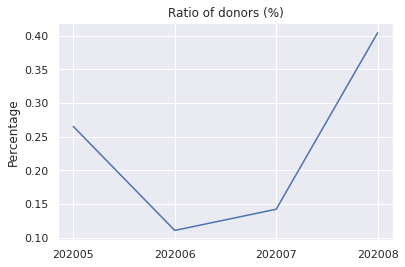

In [79]:
plt.plot(gb.month_id,gb.ratio)
plt.title('Ratio of donors (%)')
plt.ylabel('Percentage')
plt.show()

In [87]:
sub=[col for col in nos.columns if "subcat" in col and "bin" not in col]

In [89]:
for col in sub:
    nos[col]=nos[col].astype(str)

In [92]:
rem=[]
for var in nos.select_dtypes(include=['object']).columns:
    if len(nos[var].unique())>15:
        rem.append(var)

In [93]:
rem.append('month_id_original')

In [82]:
flags=[col for col in nos.columns if "_flg" in col]

In [83]:
flags.append('gender')

In [84]:
flags.extend([col for col in nos.columns if "rate_plan" in col])

In [85]:
flags.append('apple')

In [86]:
for col in flags:
    nos[col]=nos[col].astype(str)

In [94]:
nos_cat=nos.select_dtypes(include=['object']).drop(rem,axis=1)

In [95]:
len(nos_cat.columns)

21

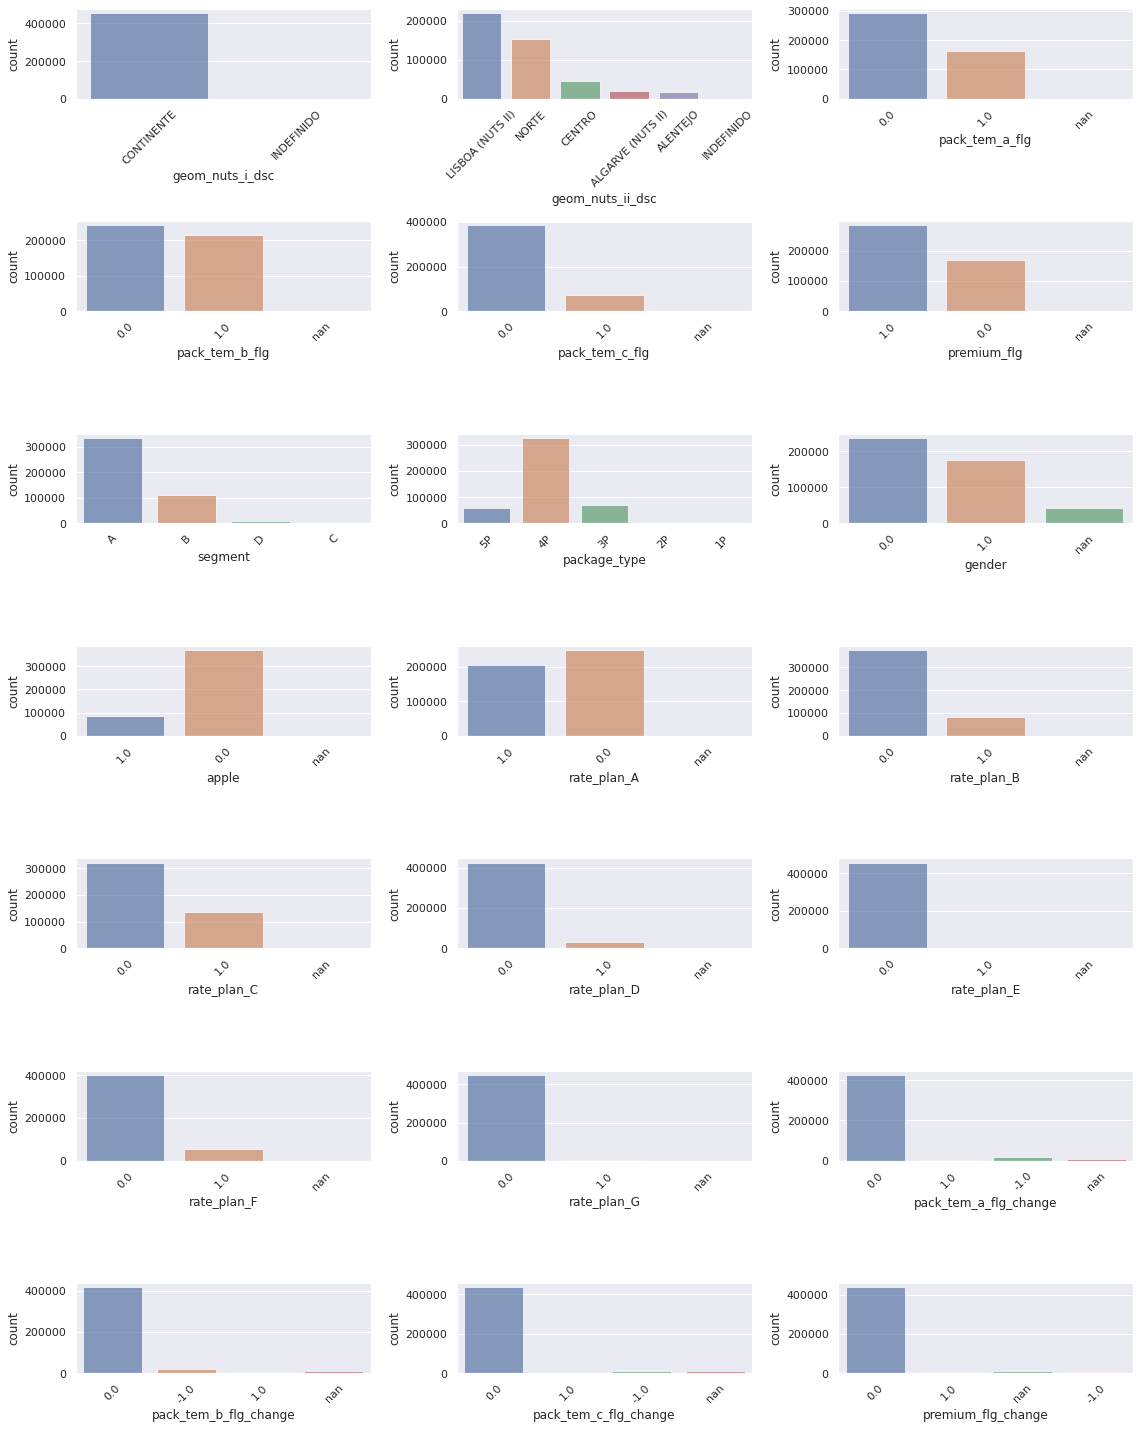

In [96]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(math.ceil(len(nos_cat.columns) / 3), 3, figsize=(16, 20))

for i, ax in enumerate(fig.axes):
    if i < len(nos_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=nos_cat.columns[i], data=nos_cat, alpha=0.7, ax=ax)

#axes.flat[-1].set_visible(False)
#axes.flat[-2].set_visible(False)
fig.tight_layout()

In [97]:
#top 10 das não vistas
t10=set(rem)-set(['sa','month_id_original'])

for col in t10:
    top=nos[col].value_counts()[:10]
    print(col,'\n',top,'\n')

subcategory_4 
 86.0     36743
90.0     33510
78.0     31601
81.0     28844
126.0    28542
93.0     22912
96.0     22099
63.0     20467
80.0     13448
31.0     12848
Name: subcategory_4, dtype: int64 

geom_freguesia_dsc 
 SETÃšBAL (SÃƒO SEBASTIÃƒO)                                                          6572
UNIÃƒO DAS FREGUESIAS DE CASCAIS E ESTORIL                                          5421
UNIÃƒO DAS FREGUESIAS DE ALTO DO SEIXALINHO, SANTO ANDRÃ‰ E VERDERENA               5138
UNIÃƒO DAS FREGUESIAS DE OEIRAS E SÃƒO JULIÃƒO DA BARRA, PAÃ‡O DE ARCOS E CAXIAS    5012
UNIÃƒO DAS FREGUESIAS DE ALMADA, COVA DA PIEDADE, PRAGAL E CACILHAS                 4732
SÃƒO DOMINGOS DE RANA                                                               4714
ALGUEIRÃƒO-MEM MARTINS                                                              4683
AMORA                                                                               4677
PORTIMÃƒO (FREGUESIA)                                            

In [98]:
nos_num=nos._get_numeric_data()

In [99]:
nos_num.drop('is_donor',axis=1,inplace=True)

In [100]:
#just for next plots, not for modeling
for col in nos_num.columns:
    nos_num[col]=nos_num[col].fillna(-2)

In [101]:
len(nos_num.columns)

82

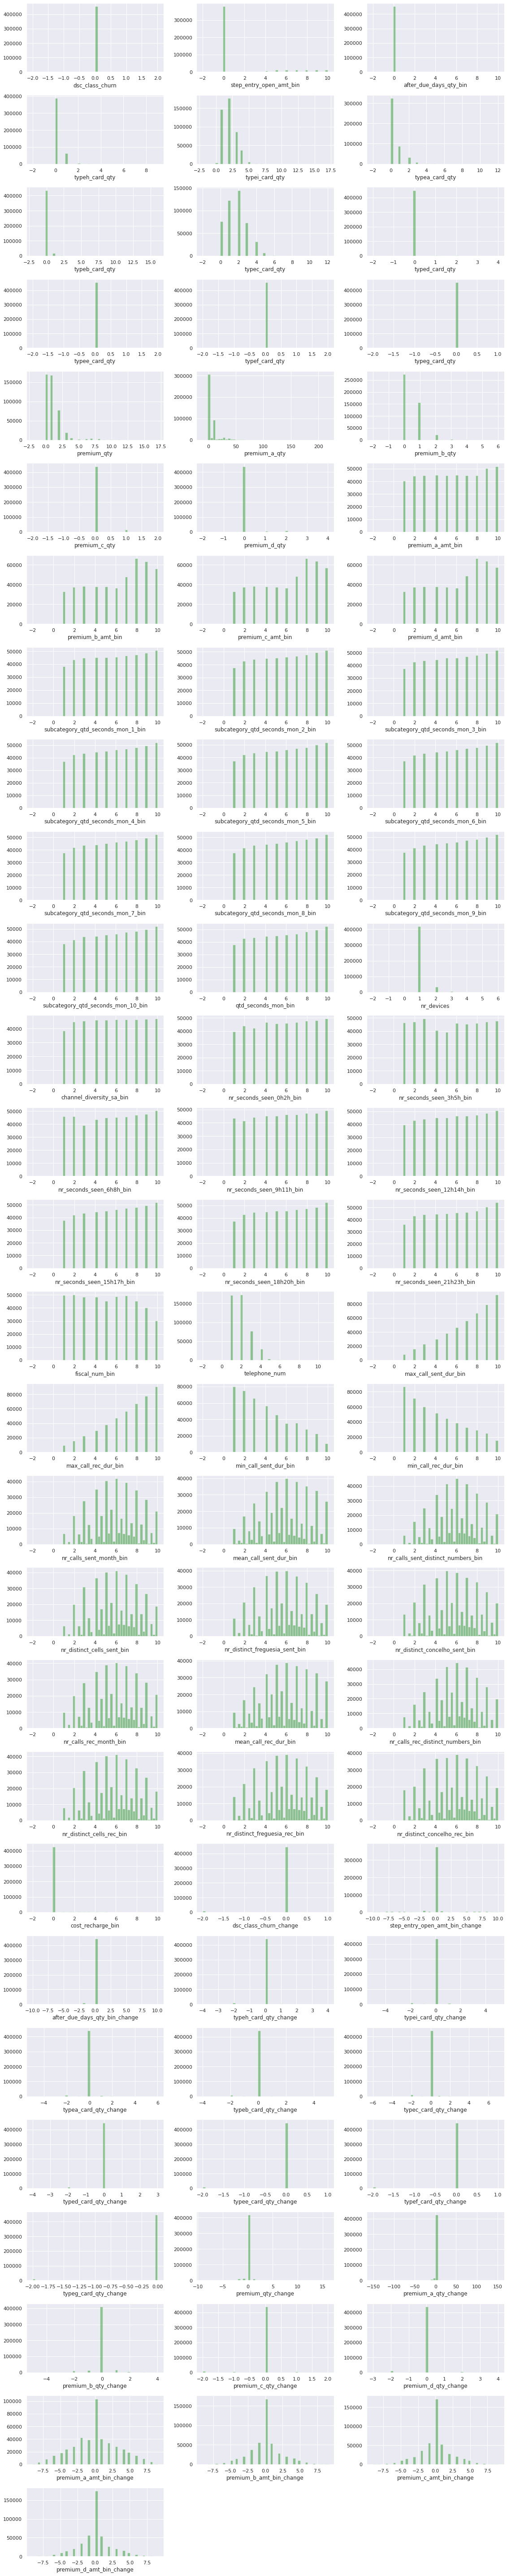

In [103]:
fig, axes = plt.subplots(math.ceil(len(nos_num.columns) / 3), 3, figsize=(16, 80))

for i, ax in enumerate(fig.axes):
    if i < len(nos_num.columns):
        sns.distplot(nos_num[nos_num.columns[i]], kde=False, color="green", ax=ax)

axes.flat[-2].set_visible(False)
axes.flat[-1].set_visible(False)
fig.tight_layout()

## cruzado com os doadores

In [104]:
nos_cat.drop('geom_nuts_i_dsc',axis=1,inplace=True)

In [105]:
nos.drop('geom_nuts_i_dsc',axis=1,inplace=True)

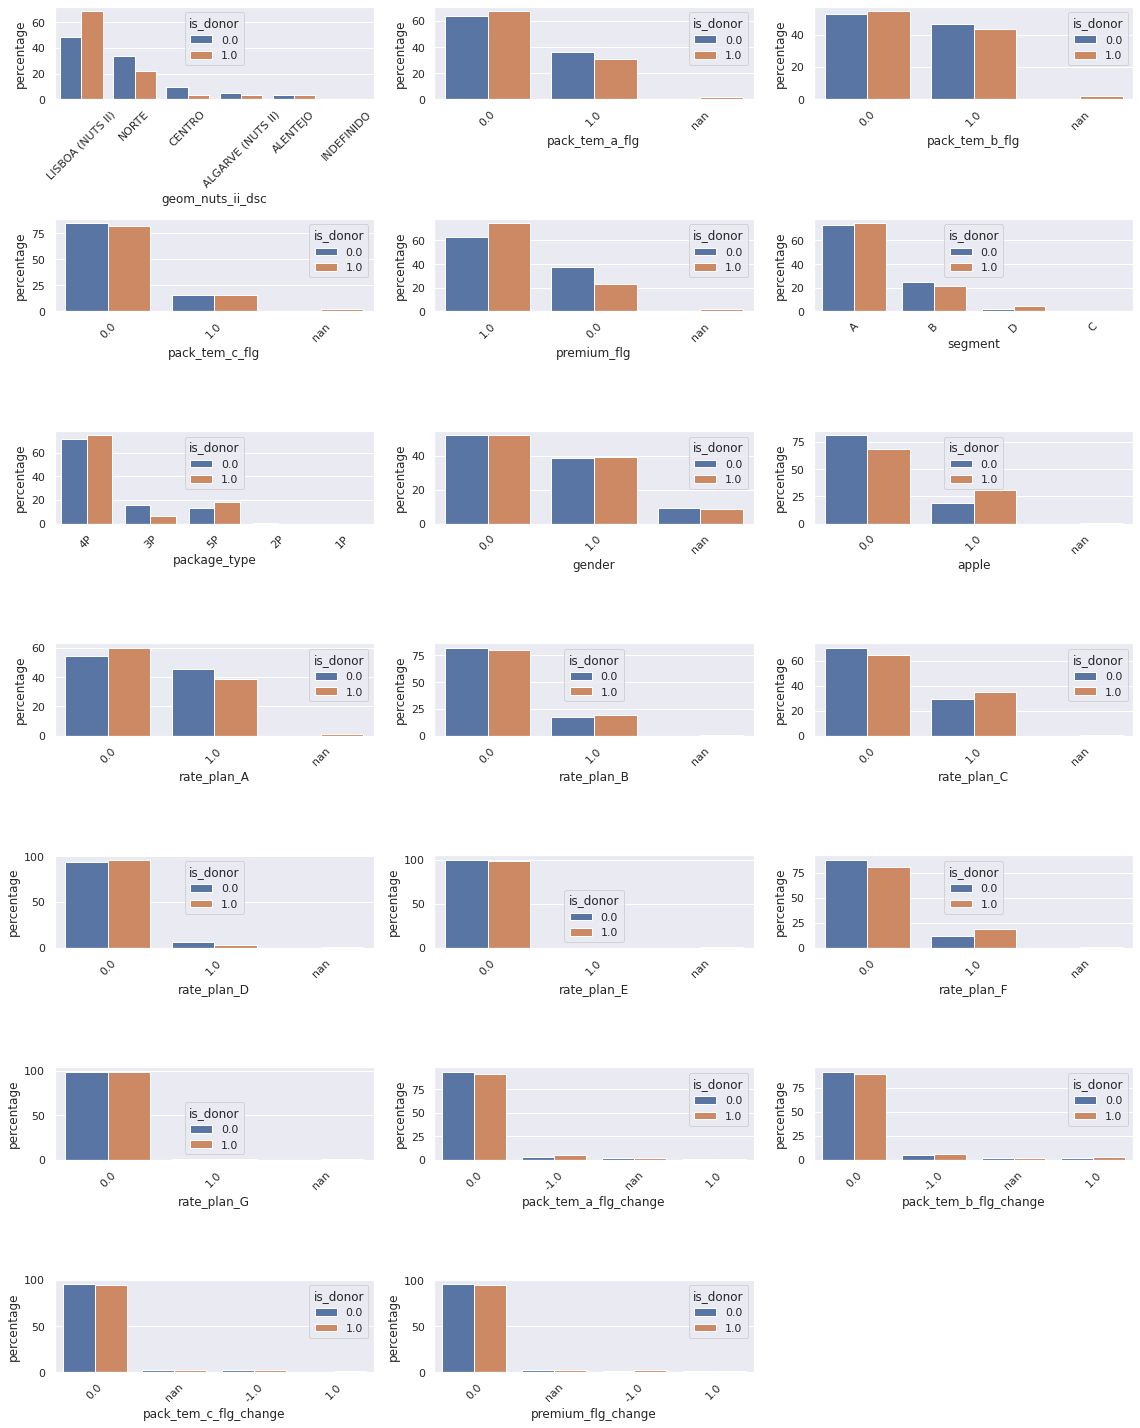

In [106]:
fig, axes = plt.subplots(math.ceil(len(nos_cat.columns) / 3), 3, figsize=(16, 20))

for i, ax in enumerate(fig.axes):
    if i < len(nos_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        
        pct = (nos.groupby(['is_donor'])[nos_cat.columns[i]]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
        sns.barplot(x=nos_cat.columns[i], y="percentage", hue="is_donor", data=pct, ax=ax)

axes.flat[-1].set_visible(False)
#axes.flat[-2].set_visible(False)
fig.tight_layout()

In [107]:
#treatments
nos.loc[~nos.geom_nuts_ii_dsc.isin(['LISBOA (NUTS II)', 'NORTE']),'geom_nuts_ii_dsc']='Other'
nos.package_type=nos.package_type.replace({'1P':'Other','2P':'Other'})
nos.segment=nos.segment.replace({'C':'CD','D':'CD'})

In [108]:
#useless
rem=['pack_tem_a_flg','pack_tem_b_flg','pack_tem_c_flg','gender','rate_plan_B','rate_plan_D','rate_plan_E',
    'rate_plan_G','pack_tem_a_flg_change','pack_tem_b_flg_change','pack_tem_c_flg_change','premium_flg_change']

nos.drop(rem,axis=1,inplace=True)

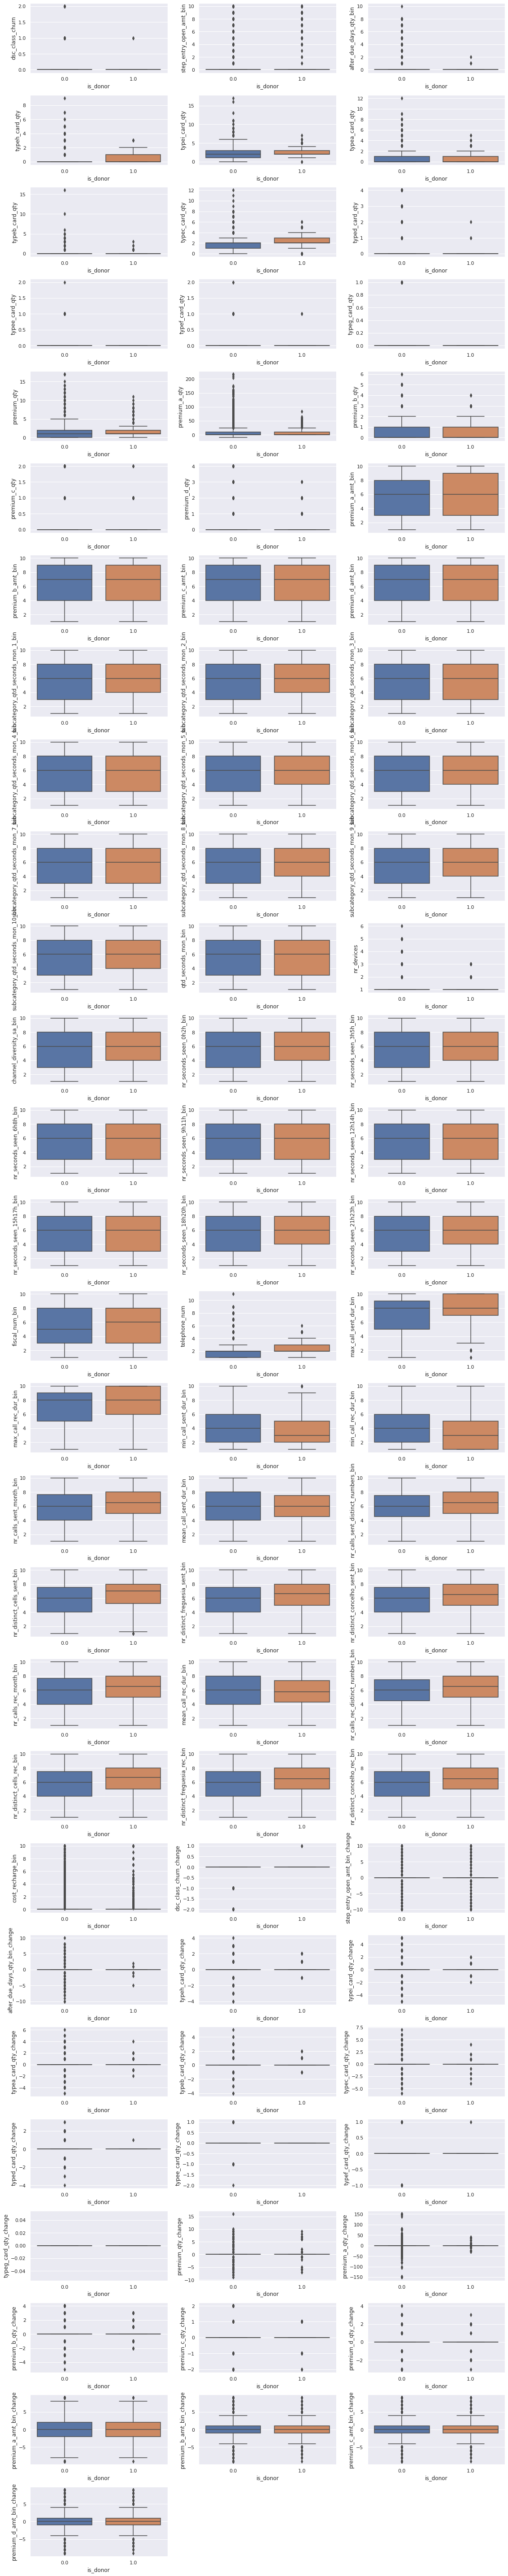

In [109]:
fig, axes = plt.subplots(math.ceil(len(nos_num.columns) / 3), 3, figsize=(16, 80))

for i, ax in enumerate(fig.axes):
    if i < len(nos_num.columns):
        #sns.distplot(nos_num[nos_num.columns[i]].dropna(), kde=False, color="green", ax=ax)
        sns.boxplot(x="is_donor", y=nos_num.columns[i], data=nos,ax=ax)

axes.flat[-2].set_visible(False)
axes.flat[-1].set_visible(False)
fig.tight_layout()

In [110]:
#useless
rem=['step_entry_open_amt_bin','premium_c_qty','premium_b_amt_bin','premium_c_amt_bin',
    'premium_d_amt_bin','subcategory_qtd_seconds_mon_3_bin',
    'subcategory_qtd_seconds_mon_4_bin','subcategory_qtd_seconds_mon_7_bin',
    'qtd_seconds_mon_bin', 'nr_seconds_seen_6h8h_bin', 'nr_seconds_seen_9h11h_bin', 
    'nr_seconds_seen_12h14h_bin','nr_seconds_seen_15h17h_bin', 'step_entry_open_amt_bin_change',
    'typeg_card_qty_change','premium_a_amt_bin_change', 'premium_b_amt_bin_change',
       'premium_c_amt_bin_change', 'premium_d_amt_bin_change']

nos.drop(rem,axis=1,inplace=True)

In [111]:
nos.head()

,sa,is_donor,month_id_original,cp4,dsc_class_churn,geom_distrito_dsc,geom_municipio_dsc,geom_freguesia_dsc,geom_nuts_ii_dsc,geom_nuts_iii_dsc,after_due_days_qty_bin,typeh_card_qty,typei_card_qty,typea_card_qty,typeb_card_qty,typec_card_qty,typed_card_qty,typee_card_qty,typef_card_qty,typeg_card_qty,premium_qty,premium_flg,pack_dsc,premium_a_qty,premium_b_qty,premium_d_qty,premium_a_amt_bin,subcategory_1,subcategory_2,subcategory_3,subcategory_4,subcategory_5,subcategory_6,subcategory_7,subcategory_8,subcategory_9,subcategory_10,subcategory_qtd_seconds_mon_1_bin,subcategory_qtd_seconds_mon_2_bin,subcategory_qtd_seconds_mon_5_bin,subcategory_qtd_seconds_mon_6_bin,subcategory_qtd_seconds_mon_8_bin,subcategory_qtd_seconds_mon_9_bin,subcategory_qtd_seconds_mon_10_bin,nr_devices,channel_diversity_sa_bin,nr_seconds_seen_0h2h_bin,nr_seconds_seen_3h5h_bin,nr_seconds_seen_18h20h_bin,nr_seconds_seen_21h23h_bin,segment,package_type,fiscal_num_bin,telephone_num,max_call_sent_dur_bin,max_call_rec_dur_bin,apple,rate_plan_A,rate_plan_C,rate_plan_F,min_call_sent_dur_bin,min_call_rec_dur_bin,nr_calls_sent_month_bin,mean_call_sent_dur_bin,nr_calls_sent_distinct_numbers_bin,nr_distinct_cells_sent_bin,nr_distinct_freguesia_sent_bin,nr_distinct_concelho_sent_bin,nr_calls_rec_month_bin,mean_call_rec_dur_bin,nr_calls_rec_distinct_numbers_bin,nr_distinct_cells_rec_bin,nr_distinct_freguesia_rec_bin,nr_distinct_concelho_rec_bin,cost_recharge_bin,dsc_class_churn_change,after_due_days_qty_bin_change,typeh_card_qty_change,typei_card_qty_change,typea_card_qty_change,typeb_card_qty_change,typec_card_qty_change,typed_card_qty_change,typee_card_qty_change,typef_card_qty_change,premium_qty_change,premium_a_qty_change,premium_b_qty_change,premium_c_qty_change,premium_d_qty_change
0,4329560142D21690C211BCA3EE65C83C,0.0,202005,2845,0.0,SETÃšBAL (DISTRITO),SEIXAL,AMORA,LISBOA (NUTS II),PENÃNSULA DE SETÃšBAL,0.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,NOS5i_100Mb + MÃ³vel 3GB + Roaming + 7GB_NPVR ...,10.0,1.0,0.0,3.0,78.0,126.0,22.0,90.0,41.0,39.0,93.0,106.0,96.0,31.0,10.0,10.0,9.0,8.0,9.0,8.0,8.0,1.0,5.0,8.0,8.0,10.0,10.0,A,5P,2.0,3.0,10.0,10.0,1.0,1.0,0.0,0.0,2.0,2.0,6.0,6.333333,6.333333,5.0,3.666667,5.00,5.00,6.0,5.666667,4.666667,4.666667,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E516D7AADFF328836280B1969577D80D,0.0,202005,2900,0.0,SETÃšBAL (DISTRITO),SETÃšBAL (MUNICIPIO),UNIÃƒO DAS FREGUESIAS DE SETÃšBAL (SÃƒO JULIÃƒ...,LISBOA (NUTS II),PENÃNSULA DE SETÃšBAL,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,NOS4i_100Mb + MÃ³vel 1GB + Roaming_NPVR (013),10.0,1.0,0.0,3.0,126.0,86.0,134.0,90.0,78.0,96.0,93.0,113.0,114.0,140.0,6.0,7.0,9.0,9.0,8.0,9.0,9.0,1.0,10.0,8.0,10.0,6.0,4.0,A,4P,1.0,2.0,9.0,8.0,0.0,1.0,0.0,0.0,5.0,5.0,7.0,4.500000,7.500000,7.0,6.000000,5.50,9.50,4.0,6.500000,6.500000,5.500000,5.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1068EC724654A19CBF73771104F00C6B,0.0,202005,2820,0.0,SETÃšBAL (DISTRITO),ALMADA,UNIÃƒO DAS FREGUESIAS DE CHARNECA DE CAPARICA ...,LISBOA (NUTS II),PENÃNSULA DE SETÃšBAL,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,NOS5u_200Mb + 4 MÃ³veis 3GB_Roaming + 7GB (004),49.0,2.0,0.0,10.0,92.0,126.0,93.0,135.0,106.0,48.0,73.0,97.0,119.0,127.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,4.0,6.0,8.0,1.0,2.0,A,5P,3.0,4.0,8.0,10.0,1.0,0.0,1.0,0.0,1.0,1.0,3.5,5.750000,4.250000,5.5,4.250000,5.25,3.75,7.5,5.250000,5.750000,3.250000,4.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,92BC24B777B922C3A61517604AFB0040,0.0,202005,4910,0.0,VIANA DO CASTELO (DISTRITO),CAMINHA,VILA PRAIA DE Ã‚NCORA,NORTE,MINHO-LIMA,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NOS4i_100Mb + 2 MÃ³veis 2GB + Roaming_NPVR (005),0.0,0.0,0.0,8.0,114.0,126.0,113.0,86.0,140.0,90.0,93.0,91.0,142.0,81.0,7.0,9.0,10.0,10.0,10.0,10.0,10.0,1.0,8.0,7.0,9.0,7.0,8.0,A,4P,8.0,2.0,10.0,7.0,0.0,1.0,0.0,0.0,5.0,5.0,7.5,6.500000,8.500000,8.0,8.000000,8.00,7.00,6.0,8.500000,7.500000,7.500000,8.00,0.0,0.0,0.0,0.0,0.0,

In [112]:
nos.to_csv('cla.gzip',compression='gzip',index=False)

In [113]:
nos.shape

(455401, 90)

## SNA

In [182]:
sna=nos[['sa','month_id_original','subcategory_1', 'subcategory_2']]

In [184]:
sna.head()

,sa,month_id_original,subcategory_1,subcategory_2
0,4329560142D21690C211BCA3EE65C83C,202005,78.0,126.0
1,E516D7AADFF328836280B1969577D80D,202005,126.0,86.0
2,1068EC724654A19CBF73771104F00C6B,202005,92.0,126.0
3,92BC24B777B922C3A61517604AFB0040,202005,114.0,126.0
4,01CEC8EC107C6A174ECDA938DD53FCE2,202005,90.0,126.0


In [207]:
sna=sna.dropna()

In [208]:
sna.subcategory_1=sna.subcategory_1.astype(int)
sna.subcategory_2=sna.subcategory_2.astype(int)

In [209]:
sna.shape

(455392, 5)

In [210]:
nos.shape

(455401, 121)

In [245]:
sna['rede']=sna[['subcategory_1', 'subcategory_2']].values.tolist()

In [246]:
treino=sna.loc[sna.month_id_original!=202008]

In [247]:
treino=treino[['sa','rede']]

In [252]:
treino['rede'][0]

[78, 126]

In [259]:
len(treino)

455392

In [260]:
treino.iloc[59758]

sa      B113FEE12C689779A28AAC6C99EAA6AE
rede                           [78, 126]
Name: 59759, dtype: object

In [264]:
treino.rede=treino.rede.apply(lambda x: sorted(x))

In [265]:
treino['rede']=treino['rede'].astype(str)

In [266]:
treino=treino.groupby(['rede']).sa.count().reset_index()

In [267]:
treino['aux']=treino.rede.apply(lambda x: x.strip('[]'))

In [268]:
treino['Source']=treino.aux.apply(lambda x: x.split(',')[0])
treino['Target']=treino.aux.apply(lambda x: x.split(',')[1])

In [269]:
treino['Weight']=treino.sa

In [270]:
treino.drop(['rede','aux','sa'],axis=1,inplace=True)

In [271]:
treino

,Source,Target,Weight
0,0,100,1
1,0,101,4
2,0,102,2
3,0,103,2
4,0,104,17
...,...,...,...
3141,99,134,14
3142,99,135,10
3143,99,138,2
3144,99,140,3


In [279]:
treino.to_excel('sna_train.xlsx',index=False)